# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
#!pip install category_encoders

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("telecom_churn.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.shape

(3333, 20)

Сначала предобработка данных: закодирую категориальные и бинарные переменные, закодирую значения целевой переменной в 0(False) и 1(True), масштабирую данные. (Standard Scaler).

In [5]:
data['Churn'] = data['Churn'].astype(int)
for column in ['International plan', 'Voice mail plan']:
    data[column] = (data[column] == 'Yes').astype('int')

In [6]:
# data['Churn'].value_counts()

In [7]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [8]:
data['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [9]:
tgt_enc = TargetEncoder(smoothing=1)
state = tgt_enc.fit_transform(data['State'], data['Churn'])
data['State'] = state
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.185714,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.128205,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.264706,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0.128205,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0.147541,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.062500,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,0.094340,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,0.092308,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,0.162162,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Теперь все признаки числовые, гуд

Буду считать качество на трейне, среднее качество по кроссвалидации на трейне и качество на тесте.

In [10]:
y = data['Churn']
X = data.drop('Churn', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=690)

In [11]:
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2599,0.147541,97,510,0,0,0,225.1,90,38.27,279.5,127,23.76,233.8,103,10.52,8.8,4,2.38,0
1767,0.100000,115,510,0,1,14,192.3,86,32.69,88.7,90,7.54,229.4,120,10.32,10.5,3,2.84,2
446,0.250000,88,510,0,0,0,138.3,116,23.51,236.0,138,20.06,179.1,110,8.06,9.6,4,2.59,3
1716,0.209677,36,510,0,1,25,152.8,110,25.98,242.8,67,20.64,147.4,74,6.63,9.1,2,2.46,1
1959,0.180723,60,510,0,1,31,191.8,75,32.61,267.8,135,22.76,200.5,62,9.02,12.8,3,3.46,2


In [12]:
len(X_train)

2333

In [13]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [14]:
# num_cols = ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes',
       #'Total day calls', 'Total day charge', 'Total eve minutes',
      # 'Total eve calls', 'Total eve charge', 'Total night minutes',
      # 'Total night calls', 'Total night charge', 'Total intl minutes',
      # 'Total intl calls', 'Total intl charge', 'Customer service calls']
#from sklearn.compose import ColumnTransformer

#ct = ColumnTransformer([('scaler', StandardScaler(), num_cols)], remainder='passthrough')

# забила на выбор колонок, решила скейлить по всей выборке 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.059316,-0.114970,1.711029,-0.341764,-0.622788,-0.595424,0.827453,-0.531082,0.827720,1.531522,1.350592,1.532061,0.656025,0.155833,0.655532,-0.521229,-0.192378,-0.516556,-1.190539
1,-0.790489,0.340808,1.711029,-0.341764,1.605684,0.425884,0.226177,-0.730714,0.226012,-2.235464,-0.508335,-2.235392,0.568706,1.030265,0.567331,0.089010,-0.593465,0.095061,0.333064
2,1.890792,-0.342860,1.711029,-0.341764,-0.622788,-0.595424,-0.763727,0.766524,-0.763894,0.672697,1.903246,0.672654,-0.429518,0.515893,-0.429343,-0.234058,-0.192378,-0.237339,1.094865
3,1.170017,-1.659553,1.711029,-0.341764,1.605684,1.228340,-0.497919,0.467077,-0.497547,0.806950,-1.663884,0.807372,-1.058618,-1.335845,-1.059982,-0.413540,-0.994553,-0.410188,-0.428738
4,0.652449,-1.051849,1.711029,-0.341764,1.605684,1.666043,0.217012,-1.279701,0.217386,1.300528,1.752522,1.299789,-0.004827,-1.953091,-0.005977,0.914629,-0.593465,0.919415,0.333064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,-1.546747,0.340808,-0.526874,-0.341764,-0.622788,-0.595424,1.195917,0.217537,1.195431,-0.847523,0.446249,-0.846405,0.578628,-1.335845,0.580561,-1.095573,1.411973,-1.101581,-1.190539
2329,1.890792,1.277687,-0.526874,-0.341764,-0.622788,-0.595424,-0.705066,0.067813,-0.704586,1.205761,-0.307370,1.206880,0.126153,0.670204,0.126325,-2.459638,-0.192378,-2.457775,0.333064
2330,0.613992,0.518056,-0.526874,-0.341764,-0.622788,-0.595424,-0.730730,0.966156,-0.730466,0.581879,1.400833,0.582068,-0.250910,1.390325,-0.252941,0.340285,0.208710,0.334390,0.333064
2331,-0.848151,0.518056,-0.691773,-0.341764,1.605684,1.082439,-0.838886,-0.780621,-0.839377,0.500932,1.601799,0.500773,-1.554753,-0.204227,-1.553909,-0.628919,-0.994553,-0.622924,0.333064


In [16]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.102180,-1.862122,-0.526874,-0.341764,-0.622788,-0.595424,-1.068030,-2.627214,-1.067983,-1.502994,0.596973,-1.503735,1.207728,1.133139,1.206790,-0.700712,-0.994553,-0.702700,3.380268
1,1.102180,-1.051849,-0.691773,-0.341764,-0.622788,-0.595424,1.333404,-0.181726,1.333457,0.378524,1.049145,0.377669,-1.802820,0.001521,-1.800872,0.771043,-0.192378,0.773158,0.333064
2,2.153662,0.290166,-0.526874,-0.341764,-0.622788,-0.595424,0.140019,-0.181726,0.139746,0.123838,0.898421,0.124492,-0.830395,0.052958,-0.830659,-0.557126,0.609797,-0.556444,0.333064
3,1.890792,0.720624,-0.691773,-0.341764,-0.622788,-0.595424,1.320571,0.017905,1.320517,-0.626400,0.245284,-0.625747,0.167828,-1.850217,0.166015,-1.634020,0.208710,-1.633422,-1.190539
4,-0.891669,0.163561,-0.691773,-0.341764,1.605684,0.498834,-0.272441,-0.780621,-0.272176,1.284733,-0.357611,1.285853,0.991413,0.721642,0.990697,0.232596,-0.192378,0.228021,-0.428738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.339844,3.126122,-0.526874,-0.341764,-0.622788,-0.595424,-0.266941,0.267445,-0.266784,1.417012,0.446249,1.415925,0.183705,-0.358539,0.183656,-0.557126,-0.593465,-0.556444,-1.190539
996,0.059316,-0.596070,-0.691773,-0.341764,-0.622788,-0.595424,-0.747228,1.964314,-0.747719,-0.207846,0.647214,-0.207657,1.701878,1.287450,1.700717,0.555664,-0.593465,0.560422,1.094865
997,2.153662,-0.342860,1.711029,-0.341764,-0.622788,-0.595424,-0.653737,0.766524,-0.653904,-0.898855,-1.312195,-0.899828,0.276978,-0.512850,0.276267,-0.880194,2.214148,-0.875548,1.094865
998,0.741672,0.771266,-0.526874,-0.341764,-0.622788,-0.595424,-1.770129,0.467077,-1.769975,0.597673,1.853005,0.598327,-1.072509,0.721642,-1.073212,-0.951987,0.208710,-0.955325,-0.428738


In [17]:
# импортирую все
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

Логистическая регрессия:

In [18]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}
gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train, y_train)
gridsearch.cv_results_

{'mean_fit_time': array([0.00922194, 0.0086266 , 0.009375  , 0.01356535, 0.07542791,
        0.01018715, 0.19518456, 0.01425529]),
 'std_fit_time': array([0.00227785, 0.00098278, 0.00080952, 0.00185633, 0.07482813,
        0.00120442, 0.12939629, 0.00084901]),
 'mean_score_time': array([0.00478759, 0.00113883, 0.0018075 , 0.00160527, 0.00080976,
        0.00100856, 0.00120444, 0.00115128]),
 'std_score_time': array([6.09446834e-03, 2.57321566e-04, 4.02249307e-04, 7.91232465e-04,
        4.06472216e-04, 2.29320503e-05, 3.96691674e-04, 4.26898526e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001,

In [19]:
print('Logistic regression','\nbest parameters:', gridsearch.best_estimator_, '\nbest score:', gridsearch.best_score_)

Logistic regression 
best parameters: LogisticRegression(C=0.001, solver='liblinear') 
best score: 0.8658398507503836


In [20]:
clf1 = LogisticRegression(C=0.001, solver='liblinear')
clf1.fit(X_train, y_train)
y_pred_train = clf1.predict(X_train)
y_pred_test = clf1.predict(X_test)

train = []
test = []

acc_train = accuracy_score(y_train, y_pred_train) 
acc_test = accuracy_score(y_test, y_pred_test)
train.append(acc_train)
test.append(acc_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
train.append(f1_train)
test.append(f1_test)

roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
train.append(roc_auc_train)
test.append(roc_auc_test)

# print('Accuracy', '\nTrain:', acc_train, '\nTest:', acc_test)
# хочу дф столбцы трейн и тест, индексы (строки) названия метрик
metrics_dict = {"Train": train, "Test": test,}
pd.DataFrame(metrics_dict, index=['Accuracy', 'F1-score', 'ROC-AUC'])

,Train,Test
Accuracy,0.867553,0.867000
F1-score,0.329718,0.265193
ROC-AUC,0.599943,0.576083


**Выводы**

Судя по значениям основных метрик, я здесь не наблюдаю ярко выраженного переобучения или недообучения. Accuracy на трейне  и тесте практически одинаковые. По значениям F-меры и ROC-AUC, наверное, можно судить о небольшом переобучении. F-мера вообще получилась достаточно маленькой, полагаю, это может указывать на то, что accuracy (количество правильных ответов) может быть неподходящей метрикой для конкретных задач с этими данными, и, если исследовать отдельно recall и precision, их значения будут уже не так хороши. Вообще сложно сказать что-то про эту модель, кроме того, что скорее всего она может лучше.

(Linear) SVM Classifier:

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1]}
gridsearch = GridSearchCV(LinearSVC(), param_grid, scoring='accuracy', cv=5)

gridsearch.fit(X_train, y_train)
gridsearch.cv_results_

C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'mean_fit_time': array([0.00950642, 0.0119679 , 0.04747367, 0.30442739]),
 'std_fit_time': array([0.00169518, 0.00260512, 0.00554489, 0.03666228]),
 'mean_score_time': array([0.00165367, 0.00174723, 0.00159016, 0.00214396]),
 'std_score_time': array([0.00062452, 0.00038884, 0.00077995, 0.00099154]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}],
 'split0_test_score': array([0.85438972, 0.85224839, 0.85010707, 0.85010707]),
 'split1_test_score': array([0.86509636, 0.86723769, 0.86509636, 0.86295503]),
 'split2_test_score': array([0.875803  , 0.875803  , 0.87794433, 0.875803  ]),
 'split3_test_score': array([0.85622318, 0.8583691 , 0.8583691 , 0.8583691 ]),
 'split4_test_score': array([0.86480687, 0.86480687, 0.86695279, 0.86695279]),
 'mean_test_score': array([0.86326382, 0.86369301, 0.86369393, 0.8628374 ]),
 'std_test

In [22]:
print('SVM classifier','\nbest parameters:', gridsearch.best_estimator_, '\nbest score:', gridsearch.best_score_)

SVM classifier 
best parameters: LinearSVC(C=0.1) 
best score: 0.8636939280036027


In [23]:
clf2 = LinearSVC(C=0.1) # просто SVC у меня почему-то странно обучается, всегда предказывает 0
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
y_pred_test = clf2.predict(X_test)

train = []
test = []

acc_train = accuracy_score(y_train, y_pred_train) 
acc_test = accuracy_score(y_test, y_pred_test)
train.append(acc_train)
test.append(acc_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
train.append(f1_train)
test.append(f1_test)

roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
train.append(roc_auc_train)
test.append(roc_auc_test)

# print('Accuracy', '\nTrain:', acc_train, '\nTest:', acc_test)
metrics_dict = {"Train": train, "Test": test,}
pd.DataFrame(metrics_dict, index=['Accuracy', 'F1-score', 'ROC-AUC'])

,Train,Test
Accuracy,0.865409,0.863000
F1-score,0.317391,0.251366
ROC-AUC,0.595117,0.570670


**Выводы**

Кажется, линейный классификатор SVM справляется чуть хуже логистической регрессии. Он дает хуже качество на трейне и хуже на тесте (но не сильно). По значениям метрик, кажется что эти модели очень похожи друг на друга по способности предсказаний. Он не переобучается и не недообучается - очень близкие значения метрик на трейне и тесте. F1-score хуже, чем в лог регрессии.

Дальше я объединяю пукнты: сначала построим матрицу корреляции и проведем отбор признаков. Потом к оставшимся признакам добавим полиномиальные степени 2.

Корреляционная матрица по исходным данным:

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

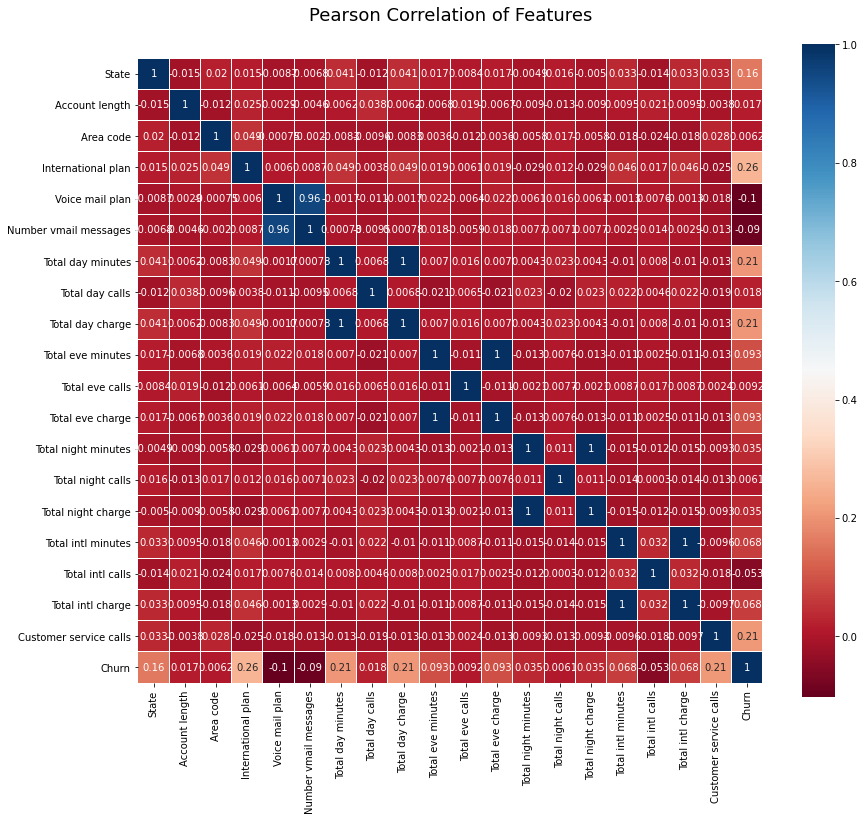

In [24]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Сразу видно, что есть признаки, которые очень сильно коррелируют между собой: например Total day charge и Total day minutes. (И это логично. Скорее всего значение charge это просто minutes, умноженное на какое- то число). Удаляю по одному признаку из пары сильно коррелирующих.

Посмотрим теперь на коэффициенты корреляции целевой переменной со всеми остальными. Есть переменные, которые больше остальных коррелируют, типа International plan (около 0.2). Большая часть переменных коррелируют с таргетом слабо.
Area Code и Total night calls выкинем по причине того, что их корреляция с таргетом наиболее близка к нулю.

In [25]:
data.columns
# вывожу чтобы скопировать названия колонок в следующей ячейке

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [26]:
for column in ['Area code','Number vmail messages','Total day charge','Total eve charge', 'Total night calls', 'Total night charge','Total intl charge']:
    data = data.drop(column, 1)
    
data

,State,Account length,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.185714,128,0,1,265.1,110,197.4,99,244.7,10.0,3,1,0
1,0.128205,107,0,1,161.6,123,195.5,103,254.4,13.7,3,1,0
2,0.264706,137,0,0,243.4,114,121.2,110,162.6,12.2,5,0,0
3,0.128205,84,1,0,299.4,71,61.9,88,196.9,6.6,7,2,0
4,0.147541,75,1,0,166.7,113,148.3,122,186.9,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.062500,192,0,1,156.2,77,215.5,126,279.1,9.9,6,2,0
3329,0.094340,68,0,0,231.1,57,153.4,55,191.3,9.6,4,3,0
3330,0.092308,28,0,0,180.8,109,288.8,58,191.9,14.1,6,2,0
3331,0.162162,184,1,0,213.8,105,159.6,84,139.2,5.0,10,2,0


Было 19 признаков, осталось 12, гуд.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

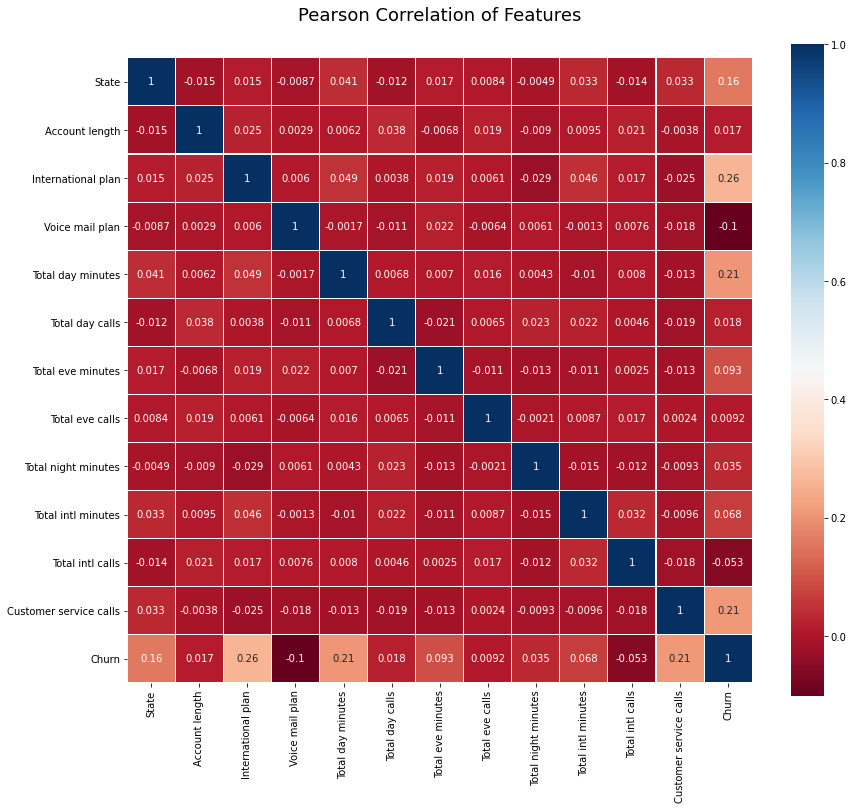

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Дальше все то же самое: делю на трейн и тест, потом добавляю полиномиальные признаки, потом стандартизирую данные и обучаю модели.

In [28]:
y = data['Churn']
X = data.drop('Churn', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=690)

In [29]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(2)
x_train = poly.fit_transform(X_train)
x_test = poly.transform(X_test)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.0,0.147541,97.0,0.0,0.0,225.1,90.0,279.5,127.0,233.8,...,54662.44,2057.44,935.2,0.0,77.44,35.2,0.0,16.0,0.0,0.0
1,1.0,0.100000,115.0,0.0,1.0,192.3,86.0,88.7,90.0,229.4,...,52624.36,2408.70,688.2,458.8,110.25,31.5,21.0,9.0,6.0,4.0
2,1.0,0.250000,88.0,0.0,0.0,138.3,116.0,236.0,138.0,179.1,...,32076.81,1719.36,716.4,537.3,92.16,38.4,28.8,16.0,12.0,9.0
3,1.0,0.209677,36.0,0.0,1.0,152.8,110.0,242.8,67.0,147.4,...,21726.76,1341.34,294.8,147.4,82.81,18.2,9.1,4.0,2.0,1.0
4,1.0,0.180723,60.0,0.0,1.0,191.8,75.0,267.8,135.0,200.5,...,40200.25,2566.40,601.5,401.0,163.84,38.4,25.6,9.0,6.0,4.0


90 признаков получилось после добавления полиномиальных

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Логистическая регрессия

In [31]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}
gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring='accuracy', cv=5)

gridsearch.fit(x_train, y_train)
gridsearch.cv_results_

{'mean_fit_time': array([0.0195116 , 0.04072242, 0.0358779 , 0.05521178, 0.08937397,
        0.0926363 , 0.84616036, 0.1564641 ]),
 'std_fit_time': array([0.00241633, 0.00262287, 0.00454269, 0.00821641, 0.01786046,
        0.00676659, 0.10962545, 0.00933487]),
 'mean_score_time': array([0.00273819, 0.00199485, 0.00186081, 0.0011116 , 0.00163369,
        0.00113516, 0.00199275, 0.00122333]),
 'std_score_time': array([1.15839943e-03, 1.86515877e-06, 4.49522849e-04, 4.72654177e-04,
        7.72138074e-04, 2.73325929e-04, 2.84146138e-05, 3.86966883e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001,

In [32]:
print('Logistic regression','\nbest parameters:', gridsearch.best_estimator_, '\nbest score:', gridsearch.best_score_)

Logistic regression 
best parameters: LogisticRegression(C=1, penalty='l1', solver='liblinear') 
best score: 0.9142715350470081


In [33]:
clf3 = LogisticRegression(C=1, penalty='l1', solver='liblinear')
clf3.fit(x_train, y_train)
y_pred_train = clf3.predict(x_train)
y_pred_test = clf3.predict(x_test)

train = []
test = []

acc_train = accuracy_score(y_train, y_pred_train) 
acc_test = accuracy_score(y_test, y_pred_test)
train.append(acc_train)
test.append(acc_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
train.append(f1_train)
test.append(f1_test)

roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
train.append(roc_auc_train)
test.append(roc_auc_test)

metrics_dict = {"Train": train, "Test": test,}
pd.DataFrame(metrics_dict, index=['Accuracy', 'F1-score', 'ROC-AUC'])

,Train,Test
Accuracy,0.930990,0.922000
F1-score,0.734761,0.660870
ROC-AUC,0.812010,0.768995


**Выводы**

Accuracy  стала выше аж почти на 0,1. Другие метрики тоже увеличились (даже еще сильнее). Кажется, что эта модель сильнее переобучается, чем все предыдущие (из-за полиномиальных признаков, в том числе). Здесь по всем метрикам видим, что на трейне качество выше, чем на тесте. Тем не менее, качество сильно улучшилось по сравнению с предыдущими моделями.

SVM

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1]}
gridsearch = GridSearchCV(LinearSVC(), param_grid, scoring='accuracy', cv=5)

gridsearch.fit(x_train, y_train)
gridsearch.cv_results_

C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'mean_fit_time': array([0.02379875, 0.13398271, 0.80659933, 0.71402469]),
 'std_fit_time': array([0.00277279, 0.02210824, 0.20218618, 0.1127941 ]),
 'mean_score_time': array([0.00119243, 0.00262241, 0.00300593, 0.00278511]),
 'std_score_time': array([0.00038457, 0.00101333, 0.00109223, 0.00039713]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}],
 'split0_test_score': array([0.85224839, 0.88222698, 0.91220557, 0.9143469 ]),
 'split1_test_score': array([0.87152034, 0.89079229, 0.8993576 , 0.90364026]),
 'split2_test_score': array([0.87794433, 0.90364026, 0.91862955, 0.91862955]),
 'split3_test_score': array([0.88197425, 0.89484979, 0.9055794 , 0.9055794 ]),
 'split4_test_score': array([0.87124464, 0.89270386, 0.90987124, 0.91630901]),
 'mean_test_score': array([0.87098639, 0.89284264, 0.90912867, 0.91170102]),
 'std_test

In [35]:
print('SVM classifier','\nbest parameters:', gridsearch.best_estimator_, '\nbest score:', gridsearch.best_score_)

SVM classifier 
best parameters: LinearSVC(C=1) 
best score: 0.9117010228745256


In [36]:
clf4 = SVC(C=1,kernel='linear') # а щас SVC норм 
clf4.fit(x_train, y_train)
y_pred_train = clf4.predict(x_train)
y_pred_test = clf4.predict(x_test)

train = []
test = []

acc_train = accuracy_score(y_train, y_pred_train) 
acc_test = accuracy_score(y_test, y_pred_test)
train.append(acc_train)
test.append(acc_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
train.append(f1_train)
test.append(f1_test)

roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
train.append(roc_auc_train)
test.append(roc_auc_test)

metrics_dict = {"Train": train, "Test": test,}
pd.DataFrame(metrics_dict, index=['Accuracy', 'F1-score', 'ROC-AUC'])

,Train,Test
Accuracy,0.929276,0.921000
F1-score,0.728171,0.663830
ROC-AUC,0.808625,0.774612


**Выводы**

новый SVM по качеству лучше первого SVM. хуже новой лог регрессии по Accuracy на тесте, лучше лог регрессии по F1 и ROC-AUC.

In [37]:
clf4 = LinearSVC(C=1)
clf4.fit(x_train, y_train)
y_pred_train = clf4.predict(x_train)
y_pred_test = clf4.predict(x_test)

train = []
test = []

acc_train = accuracy_score(y_train, y_pred_train) 
acc_test = accuracy_score(y_test, y_pred_test)
train.append(acc_train)
test.append(acc_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
train.append(f1_train)
test.append(f1_test)

roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
train.append(roc_auc_train)
test.append(roc_auc_test)

metrics_dict = {"Train": train, "Test": test,}
pd.DataFrame(metrics_dict, index=['Accuracy', 'F1-score', 'ROC-AUC'])

C:\miniconsa\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Train,Test
Accuracy,0.927132,0.921000
F1-score,0.713805,0.663830
ROC-AUC,0.796664,0.774612


По идее, Linear SVC и SVC с параметром kernel='Linear' - это одно и то же(?). Просто на первой модели до feature selection SVC у меня выдавал странные предсказания, всегда = 0, поэтому был заменен на LinearSVC. Сейчас все ок, обучила оба, качество примерно одинаковое у обоих.

**Общие выводы:**
1) Сначала построили два классификатора: лог регрессию и SVM - у обоих accuracy примерно 0,866. Не было видно, что они как-то сильно переобучены или недообучены. Метрики F1 и ROC-AUC давали сильно низкие результаты (около 0,3 и 0,6, соотвественно).

2) На этом этапе лучше справилась лог регрессия.

3) Потом провели feature selection. Убрали по одному признаку из каждой пары таких, которые сильно коррелируют между собой. Потом убрали два признака, которые слабее всего коррелируют с таргетом. 

4) Сгенерировали на основе оставшихся полиномиальные признаки второй степени. 

5) Запустили снова те же модели. 

6) Новые модели сильно улучшили качество.

7) Но у меня есть подозрение, что они переобучаются сильнее первых двух.

8) Выбор лучшей из двух последних моделей (лог регрессия и svm с полиномиальными признаками) будет осуществляться за счет того, какая метрика для нас важнее. Если accuracy - выигрывает логистическая регрессия. Если F1 или ROC-AUC - SVM показал лучшее качество на тестовой выборке. 


## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [38]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [39]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [40]:
df.target.value_counts()

0    382
1    307
Name: target, dtype: int64

In [41]:
print('доля класса 0:', len(df[df['target']==0])/df.shape[0], '\nдоля класса 1:', len(df[df['target']==1])/df.shape[0])

доля класса 0: 0.5544267053701016 
доля класса 1: 0.4455732946298984


Классы почти идеально сбалансированы. Доля каждого класса около 50%. Наблюдений в классе 0 немного больше, чем в классе 1.

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [42]:
acc_1 = accuracy_score(df['target'],df['pred1_classes'])
acc_2 = accuracy_score(df['target'],df['pred2_classes'])
acc_3 = accuracy_score(df['target'],df['pred3_classes'])
print('Accuracy 1:', acc_1, '\nAccuracy 2:', acc_2, '\nAccuracy 3:', acc_3)

Accuracy 1: 0.6618287373004355 
Accuracy 2: 0.6719883889695211 
Accuracy 3: 0.6400580551523948


Второй алгоритм лучший по accuracy.

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [43]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = [1,2,3]
recall = []
precision = []
for column in ['pred1_classes', 'pred2_classes', 'pred3_classes']:
    rec = recall_score(df['target'],df[column])
    recall.append(rec)
    prec = precision_score(df['target'],df[column])
    precision.append(prec)
    
metrics_dict = {"Recall": recall, "Precision": precision,}
pd.DataFrame(metrics_dict, index=clf)

,Recall,Precision
1,0.436482,0.690722
2,0.729642,0.610354
3,0.348534,0.690323


Лучшая полнота - у второго алгоритма. Лучшая точность - у первого.

Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [44]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

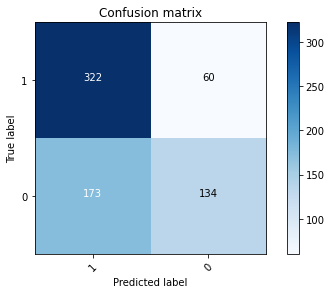

In [45]:
plot_confusion_matrix(confusion_matrix(df['target'],df['pred1_classes']), [1,0])

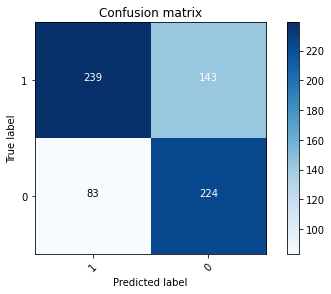

In [46]:
plot_confusion_matrix(confusion_matrix(df['target'],df['pred2_classes']), [1,0])

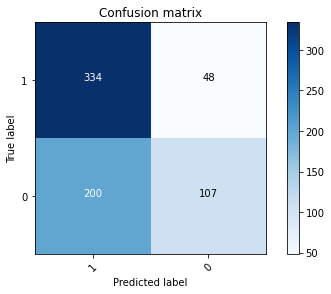

In [47]:
plot_confusion_matrix(confusion_matrix(df['target'],df['pred3_classes']), [1,0])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

Первый классификатор:

Я ищу так: сначала перебираю числа от 0 до 1 с шагом 0.1. Нахожу среди них такое, которое максимизирует нужную метрику (при этом, чтобы соблюдалось условие на accuracy). Потом ищу более точное значение порога (с шагом 0.01) рядом с тем, которое получили на предыдущем шаге.

In [48]:
thres_list = []
recall_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    rec = recall_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.4, 0.5] [0.6579804560260586, 0.4364820846905538]
Порог для max полноты: 0.4


In [49]:
thres_list = []
recall_list = []
for threshold in [0.3 + n * 1/100 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    rec = recall_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.36, 0.37, 0.38, 0.39, 0.4] [0.742671009771987, 0.7296416938110749, 0.7035830618892508, 0.6807817589576547, 0.6579804560260586]
Порог для max полноты: 0.36


In [50]:
thres_list = []
recall_list = []
for threshold in [0.35 + n * 1/1000 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    rec = recall_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.359, 0.36] [0.745928338762215, 0.742671009771987]
Порог для max полноты: 0.359


0.359 порог. Остановимся на этом?

In [51]:
y_pred_1 = np.where(df.pred1_probs >= 0.359, 1, 0)

Второй классификатор

In [52]:
thres_list = []
recall_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    rec = recall_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.3, 0.4, 0.5, 0.6, 0.7] [0.8371335504885994, 0.7980456026058632, 0.7296416938110749, 0.5179153094462541, 0.2964169381107492]
Порог для max полноты: 0.3


In [53]:
thres_list = []
recall_list = []
for threshold in [0.2 + n * 1/100 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    rec = recall_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.27, 0.28, 0.29000000000000004, 0.30000000000000004] [0.8371335504885994, 0.8371335504885994, 0.8371335504885994, 0.8371335504885994]
Порог для max полноты: 0.27


0,27 порог 

In [54]:
y_pred_2 = np.where(df.pred2_probs >= 0.27, 1, 0)

третий классификатор 

In [55]:
thres_list = []
recall_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_3 = np.where(df.pred3_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_3)
    rec = recall_score(df['target'], y_pred_3)
    if acc >= 0.65:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
# print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[] []


Тут не достигается accuracy 0.65. Поэтому оба списка оказались пустыми и мы не нашли порога, который удовлетворял бы условию задачи.

**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

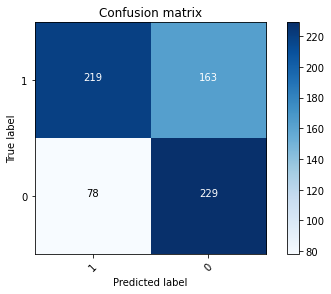

In [56]:
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_1), [1,0])

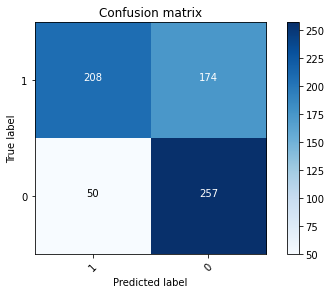

In [57]:
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_2), [1,0])

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Второй классификатор лучше справился. У него полнота при оптимальном пороге - 0.837. У первого - 0.746.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

первый классификатор

In [58]:
thres_list = []
precision_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    prec = precision_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.4, 0.5] [0.6196319018404908, 0.6907216494845361]
Порог для max точности: 0.5


C:\miniconsa\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
thres_list = []
precision_list = []
for threshold in [0.4 + n * 1/100 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    prec = precision_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.4, 0.41000000000000003, 0.42000000000000004, 0.43000000000000005, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48000000000000004, 0.49, 0.5] [0.6196319018404908, 0.6210191082802548, 0.6326530612244898, 0.6363636363636364, 0.6486486486486487, 0.6544715447154471, 0.6609442060085837, 0.6712962962962963, 0.6778846153846154, 0.6919191919191919, 0.6907216494845361]
Порог для max точности: 0.49


In [60]:
thres_list = []
precision_list = []
for threshold in [0.5 + n * 1/100 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    prec = precision_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55] [0.6907216494845361, 0.7158469945355191, 0.7102272727272727, 0.7272727272727273, 0.7371794871794872, 0.7328767123287672]
Порог для max точности: 0.54


In [61]:
thres_list = []
precision_list = []
for threshold in [0.54 + n * 1/1000 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    prec = precision_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.54, 0.541, 0.542, 0.543, 0.544, 0.545, 0.546, 0.547, 0.548, 0.549, 0.55] [0.7371794871794872, 0.7337662337662337, 0.7302631578947368, 0.7284768211920529, 0.7284768211920529, 0.7284768211920529, 0.7284768211920529, 0.7333333333333333, 0.7364864864864865, 0.7364864864864865, 0.7328767123287672]
Порог для max точности: 0.54


порог 0.54. максимальная точность 0.737

In [62]:
y_pred_1 = np.where(df.pred1_probs >= 0.54, 1, 0)

второй классификатор

In [63]:
thres_list = []
precision_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    prec = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.3, 0.4, 0.5, 0.6, 0.7] [0.5962877030162413, 0.6109725685785536, 0.6103542234332425, 0.673728813559322, 0.8125]
Порог для max точности: 0.7


C:\miniconsa\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
thres_list = []
precision_list = []
for threshold in [0.7 + n * 1/100 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    prec = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.7, 0.71, 0.72, 0.73, 0.74, 0.75] [0.8125, 0.8125, 0.8125, 0.8367346938775511, 0.8367346938775511, 0.8367346938775511]
Порог для max точности: 0.73


In [65]:
thres_list = []
precision_list = []
for threshold in [0.75 + n * 1/1000 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    prec = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.75, 0.751, 0.752, 0.753, 0.754, 0.755, 0.756] [0.8367346938775511, 0.8367346938775511, 0.8367346938775511, 0.8367346938775511, 0.8367346938775511, 0.8367346938775511, 0.8367346938775511]
Порог для max точности: 0.75


порог 0.75. Максимальная точность 0.837.

In [66]:
y_pred_2 = np.where(df.pred2_probs >= 0.75, 1, 0)

In [67]:
thres_list = []
precision_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_3 = np.where(df.pred3_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_3)
    prec = precision_score(df['target'], y_pred_3)
    if acc >= 0.65:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
# print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[] []


Не достигается accuracy 0.65

**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

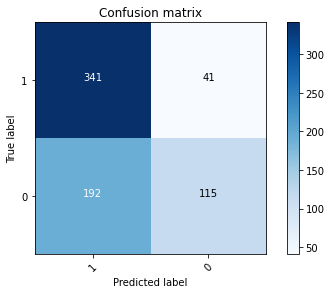

In [68]:
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_1), [1,0])

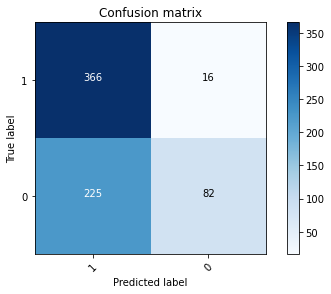

In [69]:
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_2), [1,0])

Лучше всего справилась вторая модель.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

Здесь нужно условие на accuracy?

Первый классификатор:

In [70]:
thres_list = []
f1_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    f1 = f1_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.4, 0.5] [0.6382306477093207, 0.5349301397205589]
Порог для max f1: 0.4


In [71]:
thres_list = []
f1_list = []
for threshold in [0.3 + n * 1/100 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    f1 = f1_score(df['target'], y_pred_1)
    if acc >= 0.65:
        thres_list.append(threshold)
        f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.36, 0.37, 0.38, 0.39, 0.4] [0.6551724137931035, 0.6530612244897959, 0.6428571428571428, 0.6401225114854517, 0.6382306477093207]
Порог для max f1: 0.36


In [72]:
# без условия на accuracy
thres_list = []
f1_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    f1 = f1_score(df['target'], y_pred_1)
    thres_list.append(threshold)
    f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [0.6164658634538153, 0.6164658634538153, 0.6164658634538153, 0.6527777777777777, 0.6382306477093207, 0.5349301397205589, 0.4141176470588236, 0.3341902313624679, 0.21468926553672318, 0.12650602409638553, 0.0]
Порог для max f1: 0.3


In [73]:
# без условия на accuracy
thres_list = []
f1_list = []
for threshold in [0.3 + n * 1/100 for n in range(0,11)]:
    y_pred_1 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_1)
    f1 = f1_score(df['target'], y_pred_1)
    thres_list.append(threshold)
    f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.3, 0.31, 0.32, 0.32999999999999996, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4] [0.6527777777777777, 0.6529126213592232, 0.6582914572864321, 0.6657997399219766, 0.672, 0.6648351648351648, 0.6551724137931035, 0.6530612244897959, 0.6428571428571428, 0.6401225114854517, 0.6382306477093207]
Порог для max f1: 0.33999999999999997


максимальное значение f1 тут: 0.672

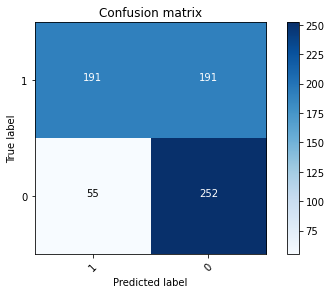

In [74]:
y_pred_1 = np.where(df.pred1_probs >= 0.34, 1, 0)
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_1), [1,0])

Второй классификатор:

In [75]:
thres_list = []
f1_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    f1 = f1_score(df['target'], y_pred_2)
    thres_list.append(threshold)
    f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [0.6164658634538153, 0.6300518134715025, 0.653061224489796, 0.6964769647696478, 0.6920903954802259, 0.6646884272997032, 0.5856353591160222, 0.43436754176610975, 0.3970223325062035, 0.07523510971786833, 0.0]
Порог для max f1: 0.3


In [76]:
thres_list = []
f1_list = []
for threshold in [0.2 + n * 1/100 for n in range(0,11)]:
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    f1 = f1_score(df['target'], y_pred_2)
    thres_list.append(threshold)
    f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.30000000000000004] [0.653061224489796, 0.653061224489796, 0.653061224489796, 0.653061224489796, 0.65375854214123, 0.65375854214123, 0.6529680365296803, 0.6964769647696478, 0.6964769647696478, 0.6964769647696478, 0.6964769647696478]
Порог для max f1: 0.27


максимальное значение f1 тут: 0.696

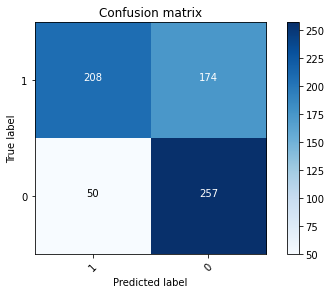

In [77]:
y_pred_2 = np.where(df.pred2_probs >= 0.27, 1, 0)
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_2), [1,0])

Третий классификатор:

In [78]:
thres_list = []
f1_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred_3 = np.where(df.pred3_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_3)
    f1 = f1_score(df['target'], y_pred_3)
    thres_list.append(threshold)
    f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [0.6164658634538153, 0.6164658634538153, 0.6253602305475504, 0.5543859649122808, 0.5100401606425703, 0.4632034632034632, 0.4328018223234624, 0.3846153846153846, 0.34975369458128075, 0.3144329896907217, 0.012944983818770227]
Порог для max f1: 0.2


максимальное значение f1 тут: 0.625

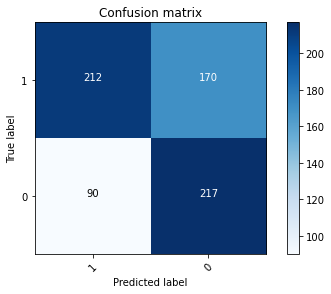

In [79]:
y_pred_3 = np.where(df.pred3_probs >= 0.2, 1, 0)
plot_confusion_matrix(confusion_matrix(df['target'] ,y_pred_3), [1,0])

Лучше всего справилась вторая модель

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [80]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [81]:
X = df.iloc[:, 0:14]
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

y = df.target

In [82]:
clf = LogisticRegression()
clf.fit(X_standard, y)

y_pred = clf.predict(X_standard)
pred_probs = clf.predict_proba(X_standard)
acc = accuracy_score(y, y_pred)

print('Accuracy', acc)

Accuracy 0.8780841799709724


In [83]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [84]:
pred_probs.T[1] # это вероятности принадлежности к классам, по ним буду искать оптимальные пороги

array([0.04137856, 0.0726862 , 0.01234364, 0.71635774, 0.94415657,
       0.87116521, 0.03678063, 0.96492212, 0.02132443, 0.7774679 ,
       0.96141499, 0.89950216, 0.71316902, 0.98355539, 0.10472723,
       0.83032884, 0.77969304, 0.01959725, 0.97792155, 0.06808037,
       0.36633471, 0.02984886, 0.54111563, 0.06273357, 0.96058371,
       0.01861643, 0.99704739, 0.75417233, 0.96329489, 0.83683834,
       0.07847741, 0.64869302, 0.91835184, 0.16654762, 0.01704122,
       0.46663386, 0.91491864, 0.94350261, 0.96101118, 0.89911612,
       0.02349363, 0.98427723, 0.81596126, 0.07928465, 0.85793752,
       0.04081676, 0.11512181, 0.06190486, 0.98195514, 0.02781385,
       0.01769482, 0.03252606, 0.03782389, 0.1018394 , 0.90378132,
       0.83661723, 0.03591569, 0.67809419, 0.74252037, 0.03099012,
       0.11403582, 0.69703029, 0.00353532, 0.85280568, 0.9855309 ,
       0.07873841, 0.38046999, 0.057139  , 0.96032524, 0.10912639,
       0.28042184, 0.10779204, 0.77954979, 0.9911215 , 0.10473

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

Уже исходя из полученного выше значения accuracy, можно предположить, что обученная лог регрессия справляется лучше, чем три готовых классификатора. Мне кажется логичным оставить в этой задаче условие на accuracy, потому что мы хотим чтобы модель выдавала адекватные предсказания (а не всегда 0 или всегда 1 - в крайних случаях на порогах 1 и 0). Поскольку accuracy здесь сильно выше, чем у классификаторов из прошлой части задания, я поставила условие, что доля правильных ответов должна быть выше 0.8.

Ищу порог для max полноты:

In [85]:
thres_list = []
recall_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred = np.where(pred_probs.T[1] >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    rec = recall_score(df['target'], y_pred)
    if acc >= 0.8:
        thres_list.append(threshold)
        recall_list.append(rec)
print(thres_list, recall_list)
print('Порог для max полноты:', thres_list[recall_list.index(max(recall_list))])

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] [0.9315960912052117, 0.9185667752442996, 0.9185667752442996, 0.8925081433224755, 0.8208469055374593, 0.742671009771987, 0.6482084690553745]
Порог для max полноты: 0.2


Увеличиваем порог - полнота падает. Оптимальное значение порога будет минимальным - 0.2 в нашем случае (или 0.0, если бы я решила не накладывать ограничение на accuracy и не отсеивать крайние значения в цикле)

Ищу порог для max точности:

In [86]:
thres_list = []
precision_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred = np.where(pred_probs.T[1] >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    prec = precision_score(df['target'], y_pred)
    if acc >= 0.8:
        thres_list.append(threshold)
        precision_list.append(prec)
print(thres_list, precision_list)
print('Порог для max точности:', thres_list[precision_list.index(max(precision_list))])

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] [0.772972972972973, 0.7899159663865546, 0.8173913043478261, 0.8430769230769231, 0.8873239436619719, 0.9156626506024096, 0.9476190476190476]
Порог для max точности: 0.8


C:\miniconsa\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Здесь все наоборот. Выше порог - выше точность.

max F1:

In [87]:
thres_list = []
f1_list = []
for threshold in [n * 1/10 for n in range(0,11)]:
    y_pred = np.where(pred_probs.T[1] >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    f1 = f1_score(df['target'], y_pred)
    if acc >= 0.8:
        thres_list.append(threshold)
        f1_list.append(f1)
print(thres_list, f1_list)
print('Порог для max f1:', thres_list[f1_list.index(max(f1_list))])

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] [0.8449039881831609, 0.8493975903614458, 0.8650306748466258, 0.8670886075949367, 0.8527918781725888, 0.8201438848920863, 0.769825918762089]
Порог для max f1: 0.5


F1 - копромисс между точностью и полнотой. Логично, что оптимальный порог будет где-то около 0.5.

Логистическая регрессия справилась лучше каждого из трех приведенных классификаторов. Значение accuracy выше и значения каждой из метрик при оптимальных порогах тоже выше.